# Homework 2: Bayesian Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
from scipy import optimize
from sklearn.linear_model import LinearRegression

## Question 1: Beyond MAP Estimation

Suppose we have a regression model 
$$
y_i = x_i^T w + \epsilon
$$
with $\epsilon \sim N(\epsilon ; 0, \sigma^2)$, $\sigma^2$ is known, and let $p(w) = N(w ; 0, \tau^2I)$ be the prior distribution of $w$.

### Part a: Find the posterior distribution of $w$

Assume that we have observed dataset $\mathcal{D} = \{(x_i, y_i\}_{i=1}^{n}$ and thus $X \in \mathbb{R}^{n \times d}$ is our design matrix with each row reflecting one of our $d$ dimensional observations, $x_i$. Note that we can write the model in matrix form as
$$
y = Xw + \epsilon
$$
with $\epsilon \sim N(\epsilon ; 0, \sigma^2I)$. Hint: Look up "completing the square"



$p(w)=\frac{1}{\sqrt{(2\pi)^{p}\det{\tau^2I}}}e^{\frac{-1}{2}\bf w^{T}(\tau^2I)^{-1}(\bf w)}$

$ p(D| w) = \prod_{i=1}^{n}\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{\frac{-1}{2\sigma^{2}}({y_i-w^{T} x_i})^{2}} =\frac{1}{(2\pi\sigma^{2})^{\frac{n}{2}}}e^{\frac{-1}{2\sigma^{2}}(\|y-Xw\|)^{2}}$

$p(w|D) \propto \frac{1}{(2\pi\sigma^{2})^{\frac{n}{2}}}\exp(\frac{-1}{2\sigma^{2}}\|y-Xw\|^{2})\cdot \frac{1}{\sqrt{(2\pi)^{p}\det{\tau^2I}}}\exp(\frac{-1}{2}\bf w^{T}(\tau^2I)^{-1}(\bf w))$

$= \frac{1}{(2\pi\sigma^{2})^{\frac{n}{2}}}\frac{1}{\sqrt{(2\pi)^{p}\det{\tau^2I}}}\exp(\frac{-1}{2\sigma^{2}}\|y-Xw\|^{2}+\frac{-1}{2} w^{T}(\tau^2I)^{-1}(w))$

If we take out the exponential part and convert it to the form : $-\frac{1}{2}\left[ax^{2}-2bx+c \right]$

we use p to represent the precision of the prior, and q to be the precsion of the likelihood, we get that 
 
$a= p + q =\frac{1}{\tau^2}I+\frac{1}{\sigma^2}X^{T}X $ and $b=\frac{1}{\sigma^2} X^{T}Y$|     

using completing the square: mean = b/a, inverse of variance= a

mean = $S\frac{1}{\sigma^2} \Phi^{T}Y$

$S^{-1} = \frac{1}{\tau^2} I + \frac{1}{\sigma^2}\Phi^{T}\Phi$

### Part b: Find the posterior predictive distribution

That is, for some test inputs $X^*$, we want to find the distribution $p(y_* | X_*, \mathcal{D}, \sigma^2, \tau^2)$ (note this distribution does _not_ depend on $w$).

$p(y|D)= \int_{}{} p(y(x_*)|w)p(w|D)\,dw$

$p(y(x_*)|w)= \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{\frac{-1}{2\sigma^{2}}({y_i-w^{T} x_i})^{2}}$

$p(y|D)= \int_{}{}\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{\frac{-1}{2\sigma^{2}}({y_*-w^{T} x_*})^{2}} \times \frac{\frac{1}{(2\pi\sigma^{2})^{\frac{n}{2}}}e^{\frac{-1}{2\sigma^{2}}\|y-Xw\|^{2}}\times \frac{1}{\sqrt{(2\pi)^{p}\det{\tau^2I}}}e^{\frac{-1}{2}\bf w^{T}(\tau^2I)^{-1}(\bf w)}}{p(D)}\,dw  $

### Part c: Gaining some intuition

Here we're going to code up our results and look at a few plots to try to gain some intuition about what's happening in Bayesian linear regression for a simple case;
$$
y = w_0 + w_1 x + w_2x^2 + \epsilon \qquad \epsilon \sim N(0, \sigma^2).
$$

#### I: Use the following cell to define $\sigma$, $\tau$, and define some data and compute the posterior distribution over $w$

Compute this posterior mean and covariance explicity using numpy, i.e. do not use an external package's implementation of Bayesian linear regression for this.

Pointer: `scipy.stats.multivariate_normal` will be a helpful function for this, all you'll need to do is compute your posterior mean vector and covariance matrix and then plug those into the `scipy` module.

In [2]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   sig = 1.
sig = 1.
#epsi var
tau = 5. 
#prior variance 

x_train = np.array([-4. , -2.6666, -1.3333,  0.,  1.3333, 2.6666,  4.])
y_train = np.array([ 8.9437,  6.3286,  2.6544,  1.1590,  2.4898,
       -1.3645, -1.5733])
nx = len(x_train)

X = np.stack((np.ones(nx), x_train, x_train**2),-1)
print(np.mean(X,0))


[ 1.00000000e+00 -1.26882631e-16  7.11098413e+00]


In [9]:
XTX=np.dot(X.transpose(),X)
covar_I =np.dot((1/(tau**2)),np.identity(3)) + XTX
covar=np.linalg.inv(covar_I)

mean= np.dot(covar,np.dot(X.transpose(),y_train))/ (sig**2)  
print (covar.shape)
print("\n")
print (mean)


(3, 3)


[ 1.83893908 -1.26065443  0.1143416 ]


**Answer Here**

#### II: Plot the prior and posterior distributions of just $w_0$ over a domain of [-2, 6].

Your posterior should be much more concentrated around a single value than the prior.

A couple hints: 

- If you have a variable `dist` that is an instance of a `scipy.stats.multivariate_normal` module, then `dist.pdf(domain)` will give you the PDF of your distribution evaluated at the points in an array `domain`
- The marginal distribution of $w_0$ is easy to compute, see pages 89-90 of 
    [Bishop's Pattern Recognition and Machine Learning](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf).

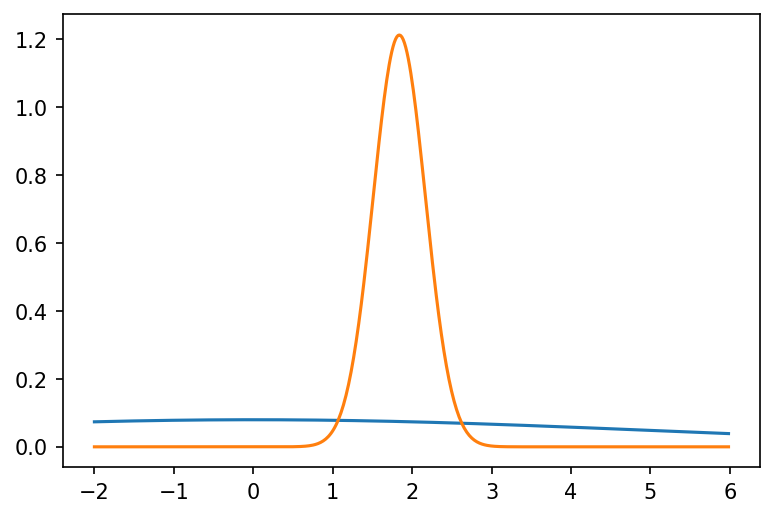

In [4]:
fig1 = plt.figure(dpi=150)
ax = fig1.add_subplot(111)
rv = multivariate_normal(mean, covar)
x = np.linspace(-2, 6, 500, endpoint=False)
ax.plot(x, stats.norm.pdf(x, 0, 5))
ax.plot(x, stats.norm.pdf(x, mean[0], covar[0][0]))

#### III: Visualizing functions sampled from the posterior

Define a set of test points, $x_*$, evenly spaced in $[-10, 10]$. Sample $20$ vectors $w$ from your posterior distribution and plot the corresponding predictions, $y_*$ for each sampled $w$. Also include the training points and the MAP prediction $y_{map}$ on the plot.

[ 1.86333516 -1.26166747  0.11238858]


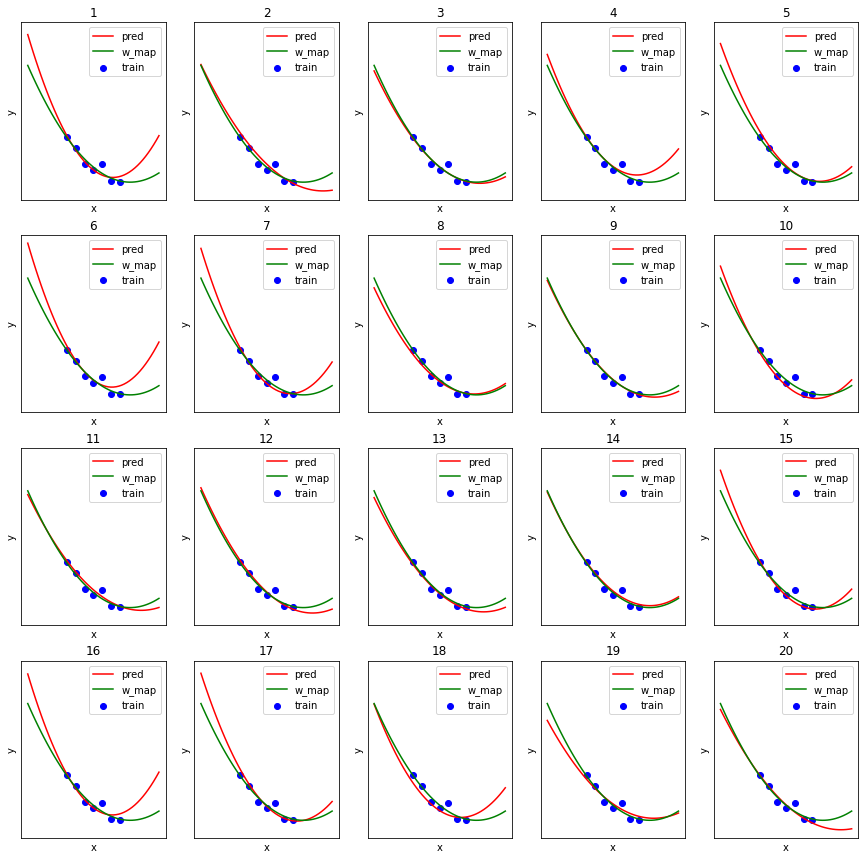

In [5]:
x_test= np.linspace(-10,10,50)

w_sample=multivariate_normal.rvs(mean=mean, cov=covar, size=20, random_state=None)
fig, axes = plt.subplots(figsize=(15, 15), nrows=4, ncols=5, sharex=True, sharey=True)

lm = LinearRegression()
model1 = lm.fit(X, y_train)
coef_= model1.coef_
coef_[0]=model1.intercept_
print(coef_)
x_min, x_max = x_test.min() - 1, x_test.max() + 1
y_min, y_max = y_train.min() - 1, y_train.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .05),
                     np.arange(y_min, y_max, .05))
def f1(x, arr):
    return arr[0]+ arr[1]*x+ arr[2]*(x**2)
count=0
for i in range(4):
    for j in range(5):
        axes[i,j].plot(x_test, f1(x_test,w_sample[count]), c='r', 
                          alpha=1, label="pred")
        axes[i,j].plot(x_test, f1(x_test,coef_), c='g', 
                          alpha=1, label="w_map")
        axes[i,j].scatter(x_train, y_train, c='b',
                          alpha=1, label= "train")

        axes[i,j].set_title(5*i+j+1)
        axes[i,j].set_xlabel('x')
        axes[i,j].set_ylabel('y')
        axes[i,j].set_xlim([x_min,x_max])
 #       axes[i,j].set_ylim([y_min,y_max])
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
        axes[i,j].legend()
        axes[i,j].grid()
        count=count+1
plt.show()

#print(w_sample)

**Answer Here**

#### IV: Plotting the Posterior Predictive

The previous plot should give us a sense of the posterior predictive distribution, which is essentially an average over the predictions sampled from the posterior. Now define the posterior predictive distribution from part b over your test points $x_*$ and use the `matplotlib` `fill_between` function to shade the mean plus or minus two standard deviations at each test point.

[35.42888227 29.95202024 25.15194245 20.97138315 17.35556641 14.25220613
 11.611506    9.38615954  7.53135009  6.00475078  4.76652459  3.77932429
  3.00829246  2.42106152  1.98775369  1.680981    1.4758453   1.34993826
  1.28334137  1.25862591  1.26085299  1.27757355  1.29882832  1.31714786
  1.32755254  1.32755254  1.31714786  1.29882832  1.27757355  1.26085299
  1.25862591  1.28334137  1.34993826  1.4758453   1.680981    1.98775369
  2.42106152  3.00829246  3.77932429  4.76652459  6.00475078  7.53135009
  9.38615954 11.611506   14.25220613 17.35556641 20.97138315 25.15194245
 29.95202024 35.42888227]


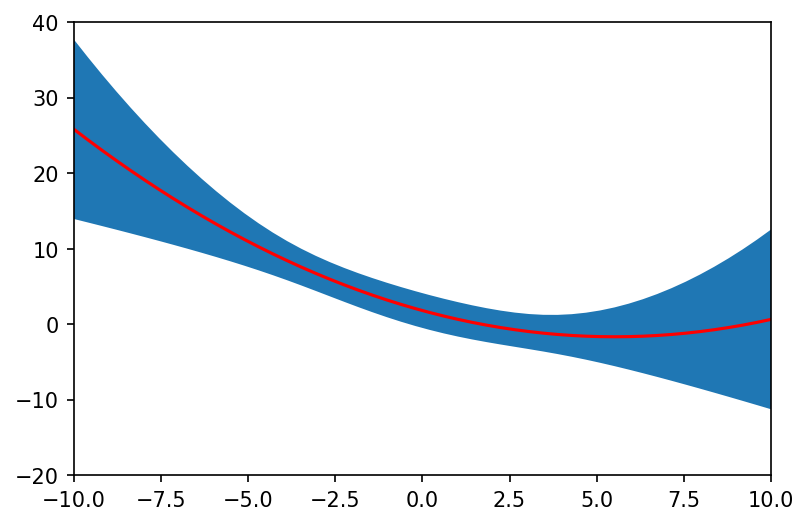

In [8]:
X_test = np.stack((np.ones(x_test.shape[0]), x_test, x_test**2), -1)
mean_T= mean.transpose()
mu_star= np.dot(mean, X_test.transpose())

var_star=  np.dot(np.dot(X_test, covar), X_test.transpose())+sig**2*np.identity(x_test.shape[0])
var_star= [var_star[i][i] for i in range(X_test.shape[0])]     
var_star= np.array(var_star) 
print (var_star)
 
def dist_mu(x, index):
    return mu_star[index]
def dist_var_mu_plus(x,index):
    return 2*np.sqrt(var_star[index])
def dist_var_mu_minus(x, index):
    return 2*np.sqrt(var_star[index])
#def dist_var_mu_plus(x, index):

fig1 = plt.figure(dpi=150)
index_x= np.arange(50)
#print(index_x.shape)

plt.ylim(-20, 40)
plt.xlim(-10, 10)

plt.plot(x_test, dist_mu(x_test,index_x),c="red")

plt.fill_between(x_test, dist_mu(x_test,index_x)+dist_var_mu_plus(x_test,index_x),dist_mu(x_test,index_x)-dist_var_mu_plus(x_test,index_x))
plt.show()

#### V: Observing New Data

Now suppose we observe a new datapoint at $(-9, 18)$. Generate the plot of the new posterior predictive distribution. What happens to your uncertainty near $x=-9$?

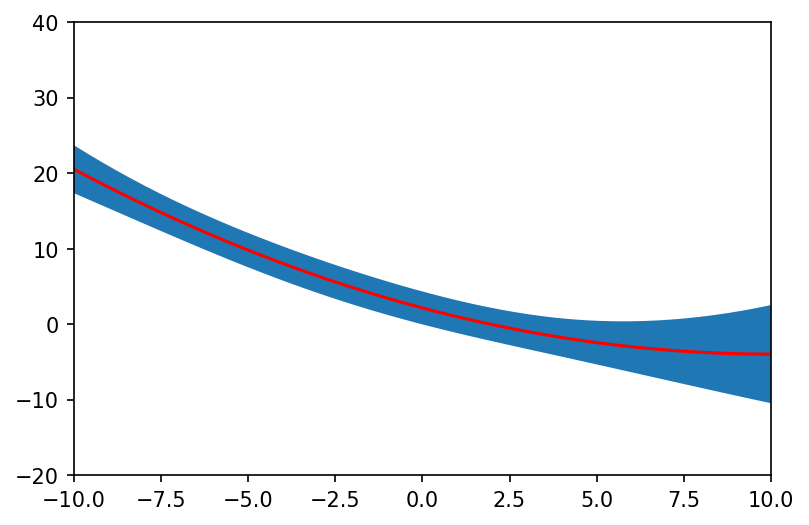

In [54]:
sig = 1.
tau = 5.

x_1 = np.array([-4. , -2.6666, -1.3333,  0.,  1.3333, 2.6666,  4., -9])
y_1 = np.array([ 8.9437,  6.3286,  2.6544,  1.1590,  2.4898, -1.3645, -1.5733, 18])

nx_1 = len(x_1)
X_1 = np.stack((np.ones(nx_1), x_1, x_1**2), -1) # and this makes your design matrix X
XTX_1=np.dot(X_1.transpose(),X_1)
covar_I_1 =np.dot((1/(tau**2)),np.identity(3)) + XTX_1
covar_1=np.linalg.inv(covar_I_1)

mean_1= np.dot(covar_1,np.dot(X_1.transpose(),y_1))/ (sig**2)  
mean_T_1= mean_1.transpose()
mu_star_1= np.dot(mean_1, X_test.transpose())

def dist_mu1(x, index):
    return mu_star_1[index]
def dist_var_mu_plus1(x,index):
    return 2*np.sqrt(var_star_1[index])
def dist_var_mu_minus1(x, index):
    return 2*np.sqrt(var_star_1[index])

var_star_1=  np.dot(np.dot(X_test, covar_1), X_test.transpose())+sig**2*np.identity(x_test.shape[0])
var_star_1= [var_star_1[i][i] for i in range(X_test.shape[0])]     
var_star_1= np.array(var_star_1)
fig2 = plt.figure(dpi=150)

plt.ylim(-20, 40)
plt.xlim(-10, 10)

plt.plot(x_test, dist_mu1(x_test,index_x),c="red")

plt.fill_between(x_test, dist_mu1(x_test,index_x)+dist_var_mu_plus1(x_test,index_x),dist_mu1(x_test,index_x)-dist_var_mu_plus1(x_test,index_x))
plt.show()

The uncertainty near x=-9 is smaller, since the noise of variance of our predictive distribution is smaller at x=-9

#### VI: Thinking About Uncertainty

Last homework we showed that the MAP estimate is equivalent to frequentist regression with a ridge penalty. Plot the predictive distribution for this case with shade representing our uncertainty. This is just $y_{map}\pm 2\sigma$. Comment on the difference in uncertainty between this and the plot from part IV as you move away from the observed data.

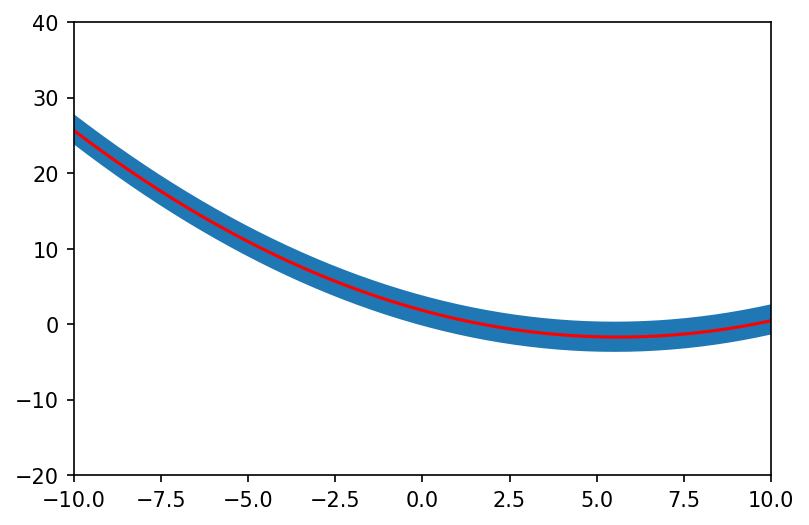

In [46]:
fig3 = plt.figure(dpi=150)
plt.plot(x_test, f1(x_test,coef_), c='r', 
                           label="w_map")
plt.ylim(-20, 40)
plt.xlim(-10, 10)
plt.fill_between(x_test, dist_mu(x_test,index_x)+2*sig,dist_mu(x_test,index_x)-2*sig)


In Part 4 as we move away from the observed data, the uncertainty becomes larger; however, in this graph, the uncertainty is a constant 2 $\sigma$ at every point on this line.

## Question 2: Posterior Variance Reduction

Consider a general Bayesian inference problem over parameters $\theta$ to explain the dataset $\mathcal{D}$, such that their joint probabilistic distribution is defined as $p(\mathcal{D},\theta)$. 

Show that the prior mean is equal to the posterior mean averaged over the data generating distribution $p(\mathcal{D})$, i.e..

$$
\mathbb{E}_{\theta}[\theta] = \mathbb{E}_{\mathcal{D}}\left[\mathbb{E}_{\theta}\left[ \theta \mid \mathcal{D} \right]\right]
$$

Further, show that on average, the posterior variance of $\theta$ is smaller than the prior variance, i.e.

$$
\mathrm{var}_\theta[\theta] = \mathbb{E}_{\mathcal{D}}[\mathrm{var}_{\theta}[\theta\mid\mathcal{D}]] + \mathrm{var}_{\mathcal{D}}[\mathbb{E}_\theta[\theta\mid\mathcal{D}]]
$$

**Hint**: It may be helpful to first prove this by considering $\theta$ and $\mathcal{D}$ as scalar values.


$\mathbb{E}_{\mathcal{D}}\left[\mathbb{E}_{\theta}\left[ \theta \mid \mathcal{D} \right]\right]$

$= \mathbb{E}\left[ \sum_\theta \theta_i \cdot p(\theta=\theta_i|D) \right]$

$= \sum_D\left[ \sum_\theta \theta_i \cdot p(\theta=\theta_i|D=D_i)\right]P(D=D_i)$

$=\sum_\theta \theta_i \sum_D p(\theta=\theta_i|D=D_i)P(D=D_i)$

$=\sum_\theta \theta_i \sum_D p(\theta=\theta_i\, \text{and} \,D=D_i)$

$=\sum_\theta \theta_i \cdot  p(\theta=\theta_i)$

$= \mathbb{E}[\theta]$


$\mathrm{var}[\theta]=\mathbb{E} \left[ \theta^{2}\right]- \mathbb{E} \left[ \theta \right]^{2}$

$\mathbb{E} \left[ \theta^{2}\right]= \mathbb{E} \left[ \mathrm{var}[\theta|D]+ \left[  \mathbb{E} \left[D|\theta \right] \right]^{2}\right]$

( according to the proof above)

$\mathbb{E} \left[ \theta^{2}\right]-\mathbb{E} \left[ \theta \right]^{2}$

$= \mathbb{E} \left[ \mathrm{var}[\theta|D]+ \left[  \mathbb{E} \left[D|\theta \right] \right]^{2}\right]-\left[\mathbb{E}\left[\mathbb{E}\left[ \theta \mid \mathcal{D} \right]\right]\right]^{2} $

$= \mathbb{E} \left[ \mathrm{var}[\theta|D]\right]+ \mathbb{E} \left[\left[  \mathbb{E} \left[D|\theta \right] \right]^{2}\right]-\left[\mathbb{E}\left[\mathbb{E}\left[ \theta \mid \mathcal{D} \right]\right]\right]^{2}$

$=\mathbb{E}_{\mathcal{D}}[\mathrm{var}_{\theta}
[\theta\mid\mathcal{D}]] + \mathrm{var}_{\mathcal{D}}[\mathbb{E}_\theta[\theta\mid\mathcal{D}]]$



## Question 3: Bayesian Model Averaging

Show that the Bayesian model average always has lower expected loss than that of a single model. Let $\Delta$ be the quantity we want to predict, $\mathcal{D}$ be the observed data, and $\mathcal{M}$ be a finite set of models. Our loss function is $\mathcal{L}(\Delta, p) = -\log p(\Delta)$ where $p$ is our probabilistic prediction.

We can predict using Bayesian Model Averaging (BMA) 
$$
p_{BMA}(\Delta) = \sum_{m \in \mathcal{M}}p(\Delta | m, \mathcal{D}) p(m | \mathcal{D})
$$
or using a single model
$$
p_{m}(\Delta) = p(\Delta | m, \mathcal{D}).
$$

Show that for any model $m \in \mathcal{M}$ 
$$
\mathbb{E}\left[ \mathcal{L}(\Delta, p_{bma})\right] \leq \mathbb{E}\left[ \mathcal{L}(\Delta, p_{m})\right],
$$
where the expectation is with respect to $\Delta$.

**Hint**: Use the non-negativity of the KL divergence.

$\mathbb{E}\left[ \mathcal{L}(\Delta, p_{bma})\right] = \int_{\Delta} \mathcal{L}(\Delta, p_{bma})p(\Delta|D) d \Delta$

$\mathbb{E}\left[ \mathcal{L}(\Delta, p_{m})\right]= \int_{\Delta} \mathcal{L}(\Delta, p_{m})p(\Delta|D) d \Delta$

$\mathbb{E}\left[ \mathcal{L}(\Delta, p_{m})\right]-\mathbb{E}\left[ \mathcal{L}(\Delta, p_{bma})\right]$

$= \int_{\Delta} \mathcal{L}(\Delta, p_{m})p(\Delta|D) d \Delta-\int_{\Delta} \mathcal{L}(\Delta, p_{bma})p(\Delta|D) d \Delta$

$=\int_{\Delta} \mathcal{L}(\Delta, p_{m})p(\Delta|D)-\mathcal{L}(\Delta, p_{bma})p(\Delta|D)  d \Delta$

$= \int_{\Delta} -\log (p_{m}(\Delta))p(\Delta|D)+\log (p_{pma}(\Delta))p(\Delta|D)d \Delta$

$=\int_{\Delta} p(\Delta|D)\log(\frac{p_{bma}(\Delta)}{p_{m}(\Delta)})    d \Delta$

since $p_{bma}(\Delta)= p(\Delta|D)$

The equation turns into

$=\int_{\Delta} p(\Delta|D)\log(\frac{p(\Delta|D)}{p_{m}(\Delta)})    d \Delta$

Which is in the form of KL divergence, and because of the non-negativity of the KL divergence, we could conclude that

$\int_{\Delta} p(\Delta|D)\log(\frac{p(\Delta|D)}{p_{m}(\Delta)})d \Delta \geq 0$

$\mathbb{E}\left[ \mathcal{L}(\Delta, p_{m})\right]-\mathbb{E}\left[ \mathcal{L}(\Delta, p_{bma})\right] \geq0$

Therefore:

$\mathbb{E}\left[ \mathcal{L}(\Delta, p_{bma})\right] \leq \mathbb{E}\left[ \mathcal{L}(\Delta, p_{m})\right]$

## Question 4: Bayesian Logistic Regression

In this section, we will develop logistic regression, and analyze it on a toy dataset.

### Part A: Derviations

#### I. Logistic function

The logistic function $\sigma(x)$ is defined as 

$$
\sigma(x) = \frac{1}{1 + \exp{\{-x\}}}
$$

Show that $\sigma(-x) = 1 - \sigma(x)$.

$\sigma(x)= \frac{1}{1+e^{-x}}$

$= \frac{e^{x}}{e^{x}+1}$

$=\frac{e^{x}+1-1}{e^{x}+1}$


$=\frac{e^{x}+1}{e^{x}+1}- \frac{1}{e^{x}+1}$

$= 1-\sigma(-x)$

#### II. Cross-Entropy Loss

Consider the problem of binary classification where every input $x$ is assigned to a class $y$, either a 0 or a 1, i.e. We define the Bernoulli likelihood parametrized by parameters $w$ as,

$$
p(y = 1\mid w, x) = \mathrm{Bern}(\sigma(w^Tx))
$$

where $\mathrm{Bern}$ is the Bernoulli distribution. Show that maximizing this likelihood is equivalent to minimizing the **cross-entropy loss** where for every input $x$, $y$ is the true output and $p(y \mid w,x)$ is the predicted output probability,

$$
\mathcal{L}(w) = \sum_{i=1}^n \ell(y_i \mid x_i; w) = - \sum_{i=1}^n y_i \log{p(y_i \mid w,x_i)}
$$

The Bernoulli likelihood :

$p(y|w,x_i)=\prod_{i=1}^{n}p(y_i=1|w)^{y_i} p(y_i=1|w)^{1-y_i}= \prod_{i=1}^{n}\sigma(w^Tx_i)^{y_i} (1-\sigma(w^Tx_i))^{1-y_i}$

Take the log likelihood:

$\log p(y|w) =\sum_{i=1}^n y_i \log \sigma(w^Tx_i)+(1-y_i)\log (1-\sigma(w^Tx_i)) $

The binary cross-entropy loss equation:

$L(w)=-\frac{1}{n}\sum_{i=1}^n y_i \log \sigma(w^Tx_i)+(1-y_i)\log (1-\sigma(w^Tx_i)) $

where we can see that $\log p(y|w)=-n L(w)$, and we have showed that maximizing bernoulli likelihood is equivalent to minimizing the cross entropy loss




#### III. The Logistic Regression Model

Write down the likelihood and log posterior (up to a constant in $w$) for the logistic regression model:
$$
p(y_i = 1 | w, x_i) = \sigma(w^Tx) = \frac{1}{1 + \exp(-w^T x_i)}
$$
for dataset $\mathcal{D} = \{(x_i, y_i)\}_{i=1}^{N}$ where $x_i \in \mathbb{R}^{d \times 1}$. Assume a Gaussian prior on $w$, $p(w) = N(0, \gamma^2 I)$.

$$
p(y | w, x) = \prod_{i=1}^{N}\sigma(w^Tx_i)^{y_i}(1-\sigma(w^Tx_i))^{(1-y_i)}
$$
and
$$
\log p(w | \mathcal{D}) \propto -\frac{1}{\gamma^2}w^T w + \sum_{i=1}^{N}y_i \log \sigma(w^Tx_i) + (1-y_i)\log \sigma(-w^Tx_i)
$$

$p(y|w,x_i)=\prod_{i=1}^{n}p(y_i=1|w)^{y_i} p(y_i=1|w)^{1-y_i}$

$=\prod_{i=1}^{n}\frac{1}{1 + \exp(w^T x_i)}^{y_i} (1-\frac{1}{1 + \exp(-w^T x_i)})^{1-y_i} $

$p(w|D) \propto -\frac{1}{\gamma^2}w^T w +\sum_{i=1}^{n}y_i log \frac{1}{1 + \exp(w^T x_i)}+(1-y_i)log(\frac{1}{1 + \exp(-w^T x_i)})$

### Part C: Implementation

Here we'll generate a few plots using a 2D logistic regression example. Use the data in `logistic_regression.npz` for this question.

#### I: Implement a function to compute the negative log likelihood, and use an optimizer (such as scipy's `minimize` function) to find an estimate of $w_{map}$. 
Assume your prior is $p(w) = N(0, 25I)$. 

In [38]:
data = np.load("./logistic_regression.npz")
 
X=data['X']
Y=data['Y'] 
nx= X.shape
dim=X.shape[0]+1
x_plt= np.linspace(-10,10,500)
gamma=5
bounds1=(-10,10)
boundsa=(bounds1, bounds1)

def pos(w):
    nll=0
    #for i in range(len(X))
    return  1/gamma**2*(np.dot(w,w.transpose()))-\
            np.sum(Y* np.log(1 / (1 + np.exp(- np.dot(X,w))))+\
            (1-Y)* np.log(1 / (1 + np.exp(np.dot(X,w)))))
sol1 = optimize.minimize(pos, x0=np.array([0,0]), bounds = boundsa)

print(sol1.x)
print(pos(np.array([2.62908611, -2.32587997])))


[ 2.62908611 -2.32587997]
0.8031677089158824


$w_{map}$ = [ 2.62908611 -2.32587997]

#### II: Now make a contour plot representing your the MAP prediction over a surface for $x_1 \in [-7, 7]$ and $x_2 \in [-7, 7]$. Include the provided training data in this plot.

You may want to employ numpy's `meshgrid` function to create the surface.

In [39]:
w_map= np.array([2.62908611,-2.32487997])
def f(x,y):
    x1=np.array([x,y])
#    return (1/(1+np.exp(-np.dot(x1.T,w_map))))
    return (1/(1+np.exp(-(w_map[0]*x+w_map[1]*y))))

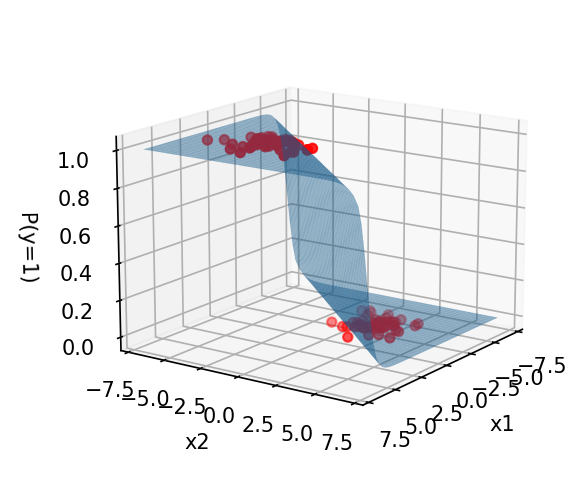

In [40]:
x1= np.linspace(-7, 7)
x2 = np.linspace(-7, 7)
agrid, bgrid = np.meshgrid(x1, x2)
fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')
fa =f(agrid, bgrid)
ax.plot_surface(agrid, bgrid, fa , alpha=0.5)
ax.set_xlabel(r'x1')
ax.set_ylabel(r'x2')
ax.set_zlabel('P(y=1)')
ax.scatter(X[:,0], X[:,1], Y, color='red')
ax.view_init(15, 35)

### Optional Bonus Questions:

The posterior predictive for test point $x_*$,
$$
\int_{w}\sigma(w^Tx_*)p(w | \mathcal{D}) dw
$$
is not tractable for this model, so we will need to perform some sort of approximation. The Laplace approximation models an unnormalized probability density as a Gaussian (please read page 341 here http://www.inference.org.uk/itprnn/book.pdf). 

Derive the Laplace approximation around the MAP estimate, $w_{map}$, to the posterior you found in part A.

**Answer Here**

### Now compute the Hessian according to your formula from part B and construct an approximation to the posterior predictive over your surface of $x_1$ and $x_2$ values from above.

You can approximate the posterior predictive by sampling $50$ sets of parameters from your laplace approximation and averaging your predictions from each sampled parameter set. Formally, let $x_* \in \mathbb{R}^{N_* \times 2}$ be your set of test points, then your predictions are

$$
y_* = \sum_{i=1}^{50} \sigma(w_i^T x_*) \textrm{ where } w_i \sim N(w_{map}, H^{-1}).
$$

Which surface looks more reasonable? The MAP estimated surface or the approximated posterior predictive? 

**Answer Here**